In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Explanation of how they measure  the Room Impulse Response

Based on the article, the Room Impulse Response (RIR) is calculated using the following formula:

r[t] = IFFT(FFT(a[t]) / FFT(l[t]))

Where:

- r[t] represents the Room Impulse Response (RIR) in the time domain
- a[t] represents the recorded signal (in this case, the logarithmic sweep signal after passing through the environment)
- l[t] represents the original logarithmic sweep signal (before passing through the environment)
- FFT() represents the Fast Fourier Transform, which transforms a signal from the time domain to the frequency domain
- IFFT() represents the Inverse Fast Fourier Transform, which transforms a signal from the frequency domain to the time domain

The division of FFT(a[t]) by FFT(l[t]) compensates for the effects of the original logarithmic sweep signal, leaving only the effects of the environment on the recorded signal. Applying the Inverse Fourier Transform (IFFT) to this result yields the Room Impulse Response of the environment in the time domain

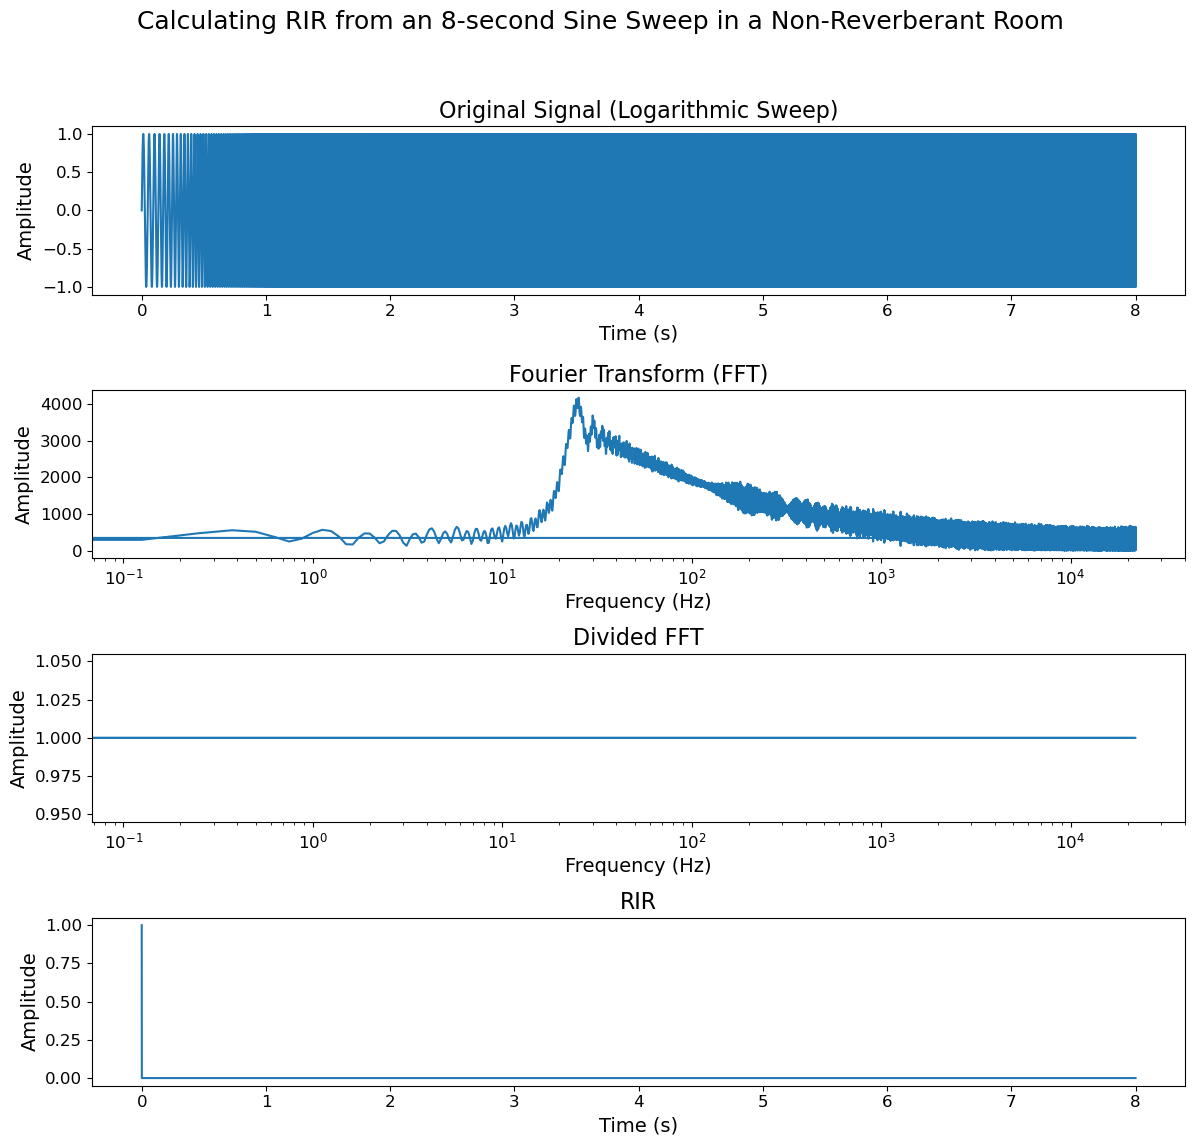

In [3]:
# Parameters
f_start = 20 # Starting frequency (Hz)
f_end = 20000 # Ending frequency (Hz)
duration = 8 # Signal duration (seconds)
fs = 44100 # Sampling frequency (Hz)

# Generate logarithmic sweep signal
t = np.linspace(0, duration, int(duration * fs), False)
f_t_log = np.logspace(np.log10(f_start), np.log10(f_end), len(t))
x_t_log = np.sin(2 * np.pi * f_t_log * t)

#Calculate FFT
fft_vals_log = np.fft.fft(x_t_log)
fft_freq_log = np.fft.fftfreq(len(t), 1 / fs)

#Divide FFT by itself
fft_div = fft_vals_log / fft_vals_log

#Calculate inverse FFT
rir = np.fft.ifft(fft_div)

# Plot original signal, FFT, and RIR
fig, axs = plt.subplots(4, 1, figsize=(12, 12))

axs[0].plot(t, x_t_log)
axs[0].set_title("Original Signal (Logarithmic Sweep)", fontsize=16)
axs[0].set_xlabel("Time (s)", fontsize=14)
axs[0].set_ylabel("Amplitude", fontsize=14)
axs[0].tick_params(axis='both', which='major', labelsize=12)

axs[1].plot(fft_freq_log, np.abs(fft_vals_log))
axs[1].set_title("Fourier Transform (FFT)", fontsize=16)
axs[1].set_xlabel("Frequency (Hz)", fontsize=14)
axs[1].set_ylabel("Amplitude", fontsize=14)
axs[1].set_xscale('log') # Logarithmic scale for frequencies
axs[1].tick_params(axis='both', which='major', labelsize=12)

axs[2].plot(fft_freq_log, np.abs(fft_div))
axs[2].set_title("Divided FFT", fontsize=16)
axs[2].set_xlabel("Frequency (Hz)", fontsize=14)
axs[2].set_ylabel("Amplitude", fontsize=14)
axs[2].set_xscale('log') # Logarithmic scale for frequencies
axs[2].tick_params(axis='both', which='major', labelsize=12)

axs[3].plot(t, np.real(rir))
axs[3].set_title("RIR", fontsize=16)
axs[3].set_xlabel("Time (s)", fontsize=14)
axs[3].set_ylabel("Amplitude", fontsize=14)
axs[3].tick_params(axis='both', which='major', labelsize=12)


plt.suptitle("Calculating RIR from an 8-second Sine Sweep in a Non-Reverberant Room", fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()